<ipython-input-1-013a7d181344>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']=df['Species'].replace('Iris-virginica',2)


<Figure size 1000x600 with 0 Axes>

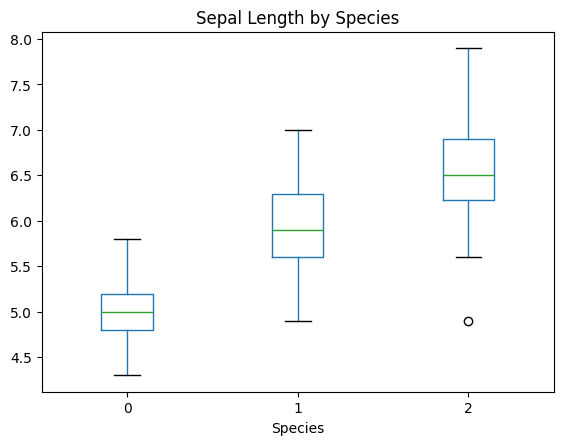

<Figure size 1000x600 with 0 Axes>

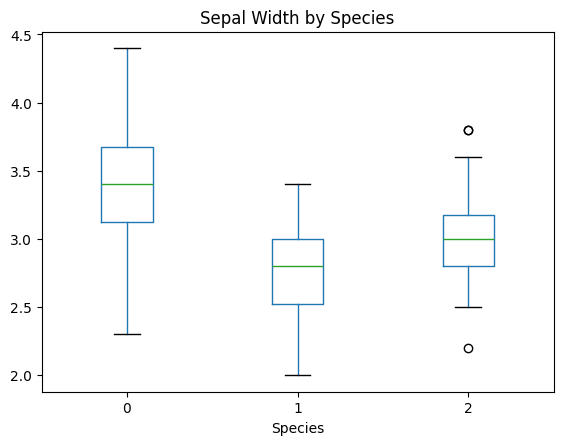

<Figure size 1000x600 with 0 Axes>

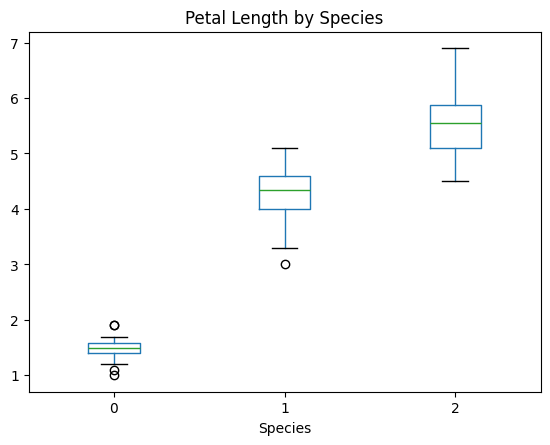

<Figure size 1000x600 with 0 Axes>

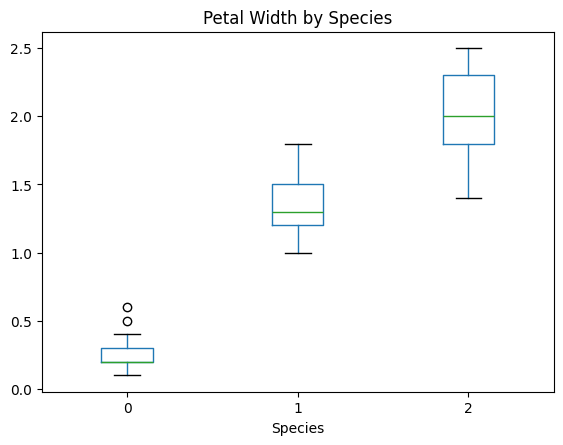

Epoch:10:
Training loss: 0.7297359108924866
Test loss:0.7779785990715027
Training accuracy:85.83333333333333
Testing accuracy:76.66666666666667
Epoch:20:
Training loss: 0.42688465118408203
Test loss:0.5262851119041443
Training accuracy:86.66666666666667
Testing accuracy:76.66666666666667
Epoch:30:
Training loss: 0.2993072271347046
Test loss:0.40135177969932556
Training accuracy:87.5
Testing accuracy:83.33333333333334
Epoch:40:
Training loss: 0.23102936148643494
Test loss:0.2906135022640228
Training accuracy:91.66666666666666
Testing accuracy:83.33333333333334
Epoch:50:
Training loss: 0.18028399348258972
Test loss:0.22296050190925598
Training accuracy:93.33333333333333
Testing accuracy:86.66666666666667
Epoch:60:
Training loss: 0.13872091472148895
Test loss:0.15500594675540924
Training accuracy:95.0
Testing accuracy:96.66666666666667
Epoch:70:
Training loss: 0.10969902575016022
Test loss:0.11681079119443893
Training accuracy:96.66666666666667
Testing accuracy:96.66666666666667
Epoch:80:

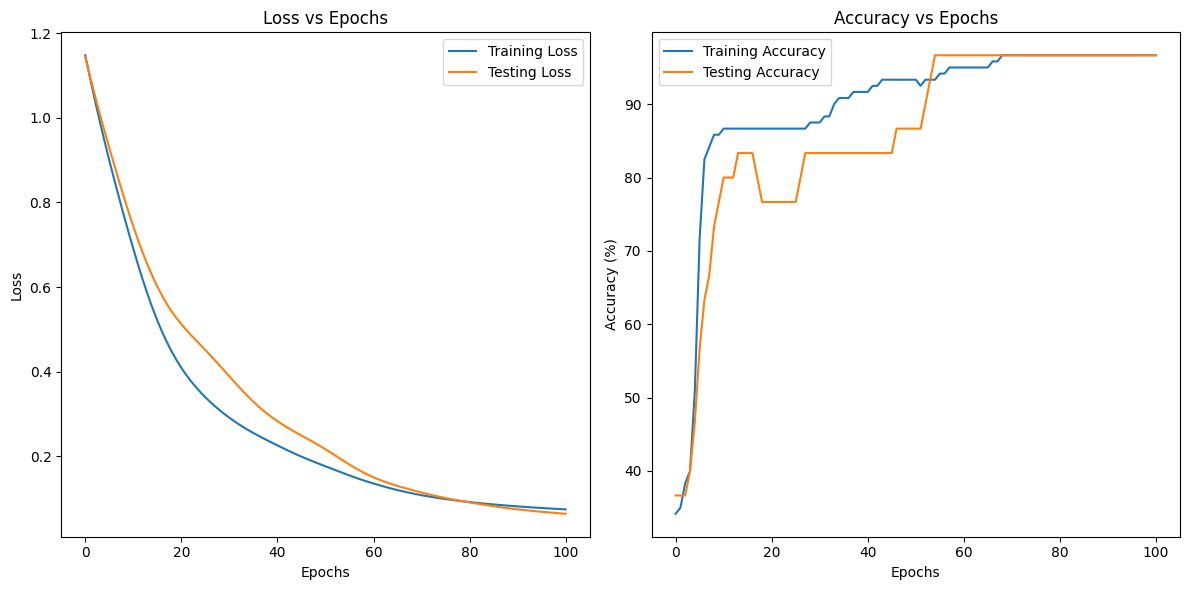

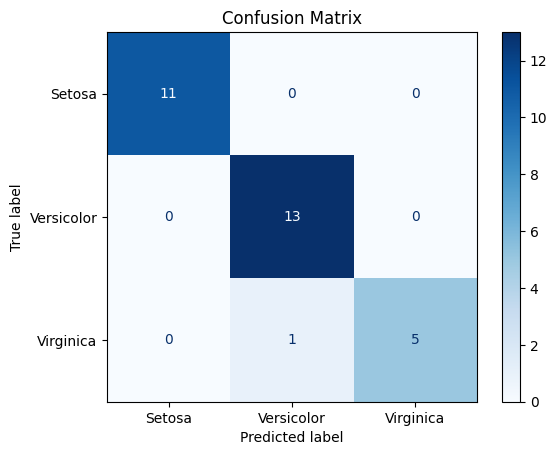

In [1]:
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#loading data
file_name='Iris.csv'
df=pd.read_csv(file_name)

#Replacing with integer labels
df['Species']=df['Species'].replace('Iris-setosa',0)
df['Species']=df['Species'].replace('Iris-versicolor',1)
df['Species']=df['Species'].replace('Iris-virginica',2)

#Splitting data for training and testing
X=df.drop(columns=['Id','Species'])
y=df['Species']
X=X.values
y=y.values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#Normalising feature values
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Converting to tensor
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


#Creating boxplots for each feature
plt.figure(figsize=(10, 6))
df.boxplot(by='Species', column='SepalLengthCm', grid=False)
plt.title('Sepal Length by Species')
plt.suptitle('')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(by='Species', column='SepalWidthCm', grid=False)
plt.title('Sepal Width by Species')
plt.suptitle('')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(by='Species', column='PetalLengthCm', grid=False)
plt.title('Petal Length by Species')
plt.suptitle('')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(by='Species', column='PetalWidthCm', grid=False)
plt.title('Petal Width by Species')
plt.suptitle('')
plt.show()

#Creating Neural Network
class Model(nn.Module):
    #Inner layer(4 neurons)->Hidden Layer(16 neurons)->Output Layer(3 neurons)
    def __init__(self,inner=4,hidden=16,outer=3):
        super(Model, self).__init__()
        self.fc1=nn.Linear(inner,hidden)
        self.out=nn.Linear(hidden,outer)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.out(x)

        return x

torch.manual_seed(41)
model=Model()

criterion=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.01)
epochs=100
train_losses=[]
test_losses=[]
training_accuracies=[]
testing_accuracies=[]

#Calculating training loss
for i in range(epochs+1):
    train_correct=0
    test_correct=0
    #Getting a prediction
    model.train()
    y_pred=model(X_train)


    train_loss=criterion(y_pred,y_train)
    #Updating tain_losses
    train_losses.append(train_loss)

#Calculating training accuracy
    _, predicted = torch.max(y_pred, 1)  # Get the predicted class indices
    train_correct = (predicted == y_train).sum().item()

    #Calculating testing error
    with torch.no_grad():
        model.eval()
        y_eval=model(X_test)
        test_loss=criterion(y_eval,y_test)

        #Updating test_losses
        test_losses.append(test_loss)

        #Calculating testing accuracy
        _, predicted = torch.max(y_eval, 1)  # Get the predicted class indices
        test_correct = (predicted == y_test).sum().item()

       #Updating accuracies
        training_accuracy=train_correct/120*100
        testing_accuracy=test_correct/30*100
        training_accuracies.append(training_accuracy)
        testing_accuracies.append(testing_accuracy)

    if not (i+1)%10:
        print(f'Epoch:{i+1}:' )
        print(f'Training loss: {train_loss}')
        print(f'Test loss:{test_loss}')
        print(f'Training accuracy:{training_accuracy}')
        print(f'Testing accuracy:{testing_accuracy}')


    optim.zero_grad()
    train_loss.backward()
    optim.step()

#Converting lists to tensors followed by numpy arrays for plotting
train_losses=torch.FloatTensor(train_losses)
test_losses=torch.FloatTensor(test_losses)
training_accuracies=torch.FloatTensor(training_accuracies)
testing_accuracies=torch.FloatTensor(testing_accuracies)

train_losses = train_losses.cpu().detach().numpy()
test_losses = test_losses.cpu().detach().numpy()
training_accuracies = training_accuracies.cpu().detach().numpy()
testing_accuracies = testing_accuracies.cpu().detach().numpy()

# Plot training and testing loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs + 1), train_losses, label='Training Loss')
plt.plot(range(epochs + 1), test_losses, label='Testing Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs + 1), training_accuracies, label='Training Accuracy')
plt.plot(range(epochs + 1), testing_accuracies, label='Testing Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Setosa", "Versicolor", "Virginica"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()